In [1]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns
# color = sns.color_palette()
# sns.set_style('darkgrid')
# pd.set_option('display.max_columns', 500)

In [2]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings("ignore")

# Utilisation de statsmodel pour récupérer les pvalues


In [199]:
# Essai avec statsmodele avec les valeurs catégoriques + numérique.
# Reste a faire le concat des pvalues de chaque colonne  


df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1).dropna()
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')
df_numerical = df_drop_nan.select_dtypes(['number'])
df_categories = df_drop_nan.select_dtypes(['object'])

formula = "SalePrice ~ "
for c in df_categories.columns[:-1]:
    formula += f'C({c}) + '
formula += f'C({df_categories.columns[-1]})'

Y = df_numerical['SalePrice']
X = df_numerical.drop('SalePrice', axis=1)
X = sm.add_constant(X)

# Numerical values
model_num = sm.OLS(Y, X).fit()

# Catégorical values
model_cat = smf.ols(formula=formula, data=df_drop_nan).fit()

In [200]:
s1 = pd.DataFrame(model_cat.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
s2 = pd.DataFrame(model_num.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
df_pvalues = pd.merge(left=s1, right=s2, on=['pvalues','column'], how='outer')
df_pvalues = df_pvalues[df_pvalues.pvalues < 0.05]
df_pvalues.sort_values(by='pvalues').head(60)

,column,pvalues
204,Overall_Qual,6.460034e-106
0,C(Bldg_Type)[T.TwnhsE],2.700912e-43
1,C(Kitchen_Qual)[T.TA],1.345519e-34
2,C(Bsmt_Qual)[T.Gd],1.413120e-24
3,C(Kitchen_Qual)[T.Gd],2.895506e-24
4,C(Bldg_Type)[T.Twnhs],2.950173e-24
5,C(Bsmt_Qual)[T.TA],8.984986e-24
205,Misc_Val,2.358463e-17
6,C(Roof_Matl)[T.WdShngl],2.782756e-17
7,C(Exter_Qual)[T.TA],5.652507e-17


In [201]:
def analyse(col):
    print('pvalues:', df_pvalues[df_pvalues.column.str.contains(col)])
    df_drop_nan.groupby(col).mean()['SalePrice'].plot()
    plt.show()
    return df_drop_nan[col].value_counts()

pvalues:                         column       pvalues
11  C(Neighborhood)[T.NoRidge]  8.812839e-15
17  C(Neighborhood)[T.StoneBr]  6.918390e-09
26  C(Neighborhood)[T.Edwards]  1.200956e-05
27  C(Neighborhood)[T.GrnHill]  1.388966e-05
28  C(Neighborhood)[T.NridgHt]  1.749662e-05
40    C(Neighborhood)[T.NAmes]  6.038826e-04
46   C(Neighborhood)[T.Sawyer]  1.082311e-03
49  C(Neighborhood)[T.Gilbert]  1.386520e-03
50  C(Neighborhood)[T.OldTown]  2.371800e-03
57  C(Neighborhood)[T.MeadowV]  6.996063e-03
58    C(Neighborhood)[T.SWISU]  7.559623e-03
59  C(Neighborhood)[T.Mitchel]  9.893649e-03
60  C(Neighborhood)[T.CollgCr]  9.914825e-03
69  C(Neighborhood)[T.SawyerW]  2.867152e-02
70   C(Neighborhood)[T.IDOTRR]  3.085123e-02
72  C(Neighborhood)[T.BrkSide]  3.485232e-02


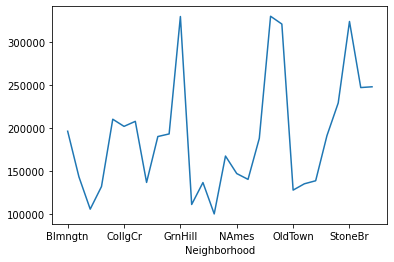

NAmes      416
CollgCr    262
OldTown    203
Somerst    170
NridgHt    163
Gilbert    159
Edwards    142
Sawyer     140
NWAmes     131
SawyerW    107
Mitchel    101
Crawfor    101
BrkSide     93
NoRidge     71
Timber      70
IDOTRR      69
StoneBr     51
ClearCr     42
SWISU       38
BrDale      29
Blmngtn     28
MeadowV     25
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      1
Landmrk      1
Name: Neighborhood, dtype: int64

In [202]:
analyse('Neighborhood')

# Test modèle avec ces features


In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler, StandardScaler

In [204]:
def neighbors_and_conditions_dict(df):
    neighbors_dict = {}
    for idx, value in enumerate(list(df.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=True).index)):
        neighbors_dict[value] = idx 
    return neighbors_dict

In [205]:
def data_preprocessing(df):
    
    df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1).dropna()
    
    df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')
    
    return df_drop_nan

In [206]:
def data_augmentation(df, dico_neigbhors ):
    
    df['Neighborhood'] = df['Neighborhood'].replace(dico_neigbhors)
    df['Neighborhood'] = df['Neighborhood'].astype(int)
    
    dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
    df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
    df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
    df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
    df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
    df['condition_interieur'] = 1.8 * df['Overall_Cond'] + 2 * df['Overall_Qual'] + 0.6 * df['Kitchen_Qual'] 
    
    df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']
    
    df['main_score'] = df['Neighborhood'] * df['surface_total'] * df['condition_interieur']
    
    return df

In [207]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'condition_interieur', 'main_score',
            'SalePrice']

df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = data_preprocessing(df)

dico_neigbhors = neighbors_and_conditions_dict(df_drop_nan)
df_drop_nan = data_augmentation(df_drop_nan, dico_neigbhors)[to_keep]
df_numerical = df_drop_nan.select_dtypes(['number'])

Y = df_numerical['SalePrice']
X = df_numerical.drop('SalePrice', axis=1)
X = sm.add_constant(X)

# Numerical values
model_num = sm.OLS(Y, X).fit()
df_pval = pd.DataFrame(model_num.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
df_pval.sort_values(by='pvalues')

,column,pvalues
0,main_score,1.779575e-220
1,Neighborhood,5.552290e-58
2,condition_interieur,4.171363e-53
3,Garage_Cars,7.997103e-32
4,surface_total,5.938777e-14
5,MS_SubClass,2.808621e-13
6,Overall_Cond,1.014950e-12
7,Overall_Qual,5.358172e-09
8,Misc_Val,9.225938e-08
9,Kitchen_Qual,2.685998e-06


In [184]:
# # Quand il y a des valeurs catégorique dans le jeu de donnée: 

# # Essai avec statsmodele avec les valeurs catégoriques + numérique.
# # Reste a faire le concat des pvalues de chaque colonne  

# df = pd.read_csv("../data/AmesHousing.csv")
# df_drop_nan = data_preprocessing(df)

# dico_neigbhors = neighbors_and_conditions_dict(df_drop_nan)
# df_drop_nan = data_augmentation(df_drop_nan, dico_neigbhors)[to_keep]
# df_numerical = df_drop_nan.select_dtypes(['number'])
# df_categories = df_drop_nan.select_dtypes(['object'])

# formula = "SalePrice ~ "
# # for c in df_numerical.columns:
# #     formula += f"{c} + "
# for c in df_categories.columns[:-1]:
#     formula += f'C({c}) + '
# formula += f'C({df_categories.columns[-1]})'

# Y = df_numerical['SalePrice']
# X = df_numerical.drop('SalePrice', axis=1)
# X = sm.add_constant(X)

# # Numerical values
# model_num = sm.OLS(Y, X).fit()

# # Catégorical values
# model_cat = smf.ols(formula=formula, data=df_drop_nan).fit()

# s1 = pd.DataFrame(model_cat.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
# s2 = pd.DataFrame(model_num.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
# df_pvalues = pd.merge(left=s1, right=s2, on=['pvalues','column'], how='outer')
# df_pvalues = df_pvalues[df_pvalues.pvalues < 0.05]
# df_pvalues.sort_values(by='pvalues').head(60)


In [215]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'condition_interieur', 'main_score',
            'SalePrice']

# Import data
df = pd.read_csv("../data/AmesHousing.csv")
# On drop les colonnes avec + 10% de Nan 
# Puis on drop les quelques dernières lignes contenant des Nan 
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1).dropna()
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')


# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_drop_nan, df_drop_nan.SalePrice, test_size=0.2, random_state=42)
dico_neigbhors = neighbors_and_conditions_dict(X_train)
X_train = data_augmentation(X_train, dico_neigbhors)[to_keep]
X_test = data_augmentation(X_test, dico_neigbhors)[to_keep]

X_train

,Neighborhood,Overall_Cond,Overall_Qual,Kitchen_Qual,Exter_Qual,Garage_Cars,Misc_Val,MS_SubClass,surface_total,condition_interieur,main_score,SalePrice
2571,11,7,6,2,2,2.0,0,20,3024.0,25.8,858211.2,135000
2514,21,5,7,3,3,1.0,0,60,3957.0,24.8,2060805.6,200000
1663,11,5,6,2,2,2.0,0,20,3225.0,22.2,787545.0,143250
1089,15,5,7,3,3,2.0,0,60,4280.0,24.8,1592160.0,188000
72,14,5,7,3,3,2.0,0,60,5780.0,24.8,2006816.0,233000
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,21,5,8,3,3,2.0,0,20,5383.0,26.8,3029552.4,260000
1187,13,5,6,2,2,2.0,0,20,5521.0,22.2,1593360.6,150000
1225,11,8,5,3,2,1.0,0,20,3278.0,26.2,944719.6,141500
1415,5,5,5,2,2,1.0,0,190,4532.0,20.2,457732.0,125000


In [216]:
def analyse(col):
    print('pvalues:', df_pval[df_pval.column.str.contains(col)])
    X_train.groupby(col).mean()['SalePrice'].plot()
    plt.show()
    return X_train[col].value_counts()

In [14]:
# form 

# ------------------------------------
# surface_total (include ground and stairs)
# Quartier 
# Overall condition 
# Overall Quality 
# Kitchen Quality 
# Exter Quality 
# Misc Val 
# Cars in Garage 
# surface terminé du garage ()
# MS_SubClass 
# -----------------------------------

In [213]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'condition_interieur', 'main_score',
            'SalePrice']

# Import data + preprocessing 
df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = data_preprocessing(df)

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_drop_nan, df_drop_nan.SalePrice, test_size=0.2, random_state=42)
neighbors_dico = neighbors_and_conditions_dict(X_train)

# Apply data augmentation 
X_train = data_augmentation(X_train, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)
X_test = data_augmentation(X_test, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)

# Models pipelines and features selections for each pipeline 
pipelines_1 = make_pipeline(StandardScaler())
pipelines_2 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

numerique_cols = ['surface_total','condition_interieur','main_score']
categorical_cols = list(X_train.columns.drop(numerique_cols))

# Apply model preprocessing and fit 
preprocessing_model = make_column_transformer((pipelines_1, numerique_cols), 
                                              (pipelines_2, categorical_cols), 
                                              )
model = make_pipeline(preprocessing_model, LinearRegression())
model.fit(X_train, y_train)

# Models scoring
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
print('R2 score on train data: ', model.score(X_train, y_train))
print('R2 score on test data: ', model.score(X_test, y_test))
print('MAE on train data: ', mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test))

from sklearn.model_selection import cross_val_score

r2_score = cross_val_score(model, X_test, y_test, cv=10, scoring='r2')
mae_score = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_absolute_error')
print('\n-- Cross-validation r2 score', r2_score.mean())
print('-- Cross-validation mean score', np.abs(mae_score.mean()))

R2 score on train data:  0.9111993476433772
R2 score on test data:  0.919526518435997
MAE on train data:  15215.458144849474
MAE on test data:  15675.201397496665

-- Cross-validation r2 score 0.9202019207606215
-- Cross-validation mean score 16236.287998879265


In [61]:
# R2 score on train data:  0.9115520337528904
# R2 score on test data:  0.920022778592911
# MAE on train data:  15194.133138746649
# MAE on test data:  15618.58395718177

# -- Cross-validation r2 score 0.9203502847034392
# -- Cross-validation mean score 16200.426802658674

In [16]:
# from joblib import dump
# dump(model, "../fit/model_16790.joblib")

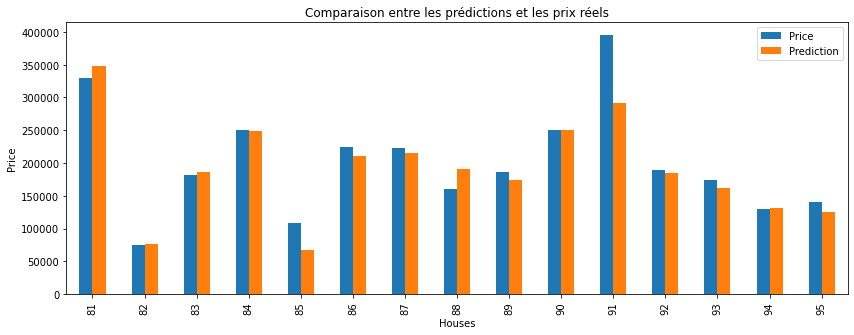

In [ ]:
df_pred = pd.DataFrame(predict_test, y_test).reset_index()
df_pred.columns = ['Price', 'Prediction']
random = np.random.randint(0,df_pred.shape[0])
df_pred[random:random+15].plot.bar( figsize=(14,5))
plt.title('Comparaison entre les prédictions et les prix réels')
plt.xlabel('Houses')
plt.ylabel('Price')
plt.show()